In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [15, 12]
%matplotlib inline

In [ ]:
url_train_tr = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/train_01.csv'
url_test_tr = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/test_01.csv'
df_train = pd.read_csv(url_train_tr)
df_test = pd.read_csv(url_test_tr)
f'"df_train.shape:":{df_train.shape}, "df_test.shape:":{df_test.shape}'

'"df_train.shape:":(11033, 54), "df_test.shape:":(1000, 53)'

In [ ]:
# para informar no pycaret:
l_categorica = ['cnae_secao', 'ind28', 'ind31', 'ind32', 'ind34',  'ind35', 'ind36', 'ind37', 'ind39', 'ind42', 'ind43']

In [ ]:
#df_total = pd.get_dummies(df_total, drop_first=False)
#f'"df_total.shape:":{df_total.shape}'


In [ ]:
df_train.set_index('id', inplace=True)
df_test.set_index('id',inplace=True)

f'"df_train.shape:":{df_train.shape}, "df_test.shape:": {df_test.shape}'

'"df_train.shape:":(11033, 53), "df_test.shape:": (1000, 52)'

## PYCARET

In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 5.4MB/s 
     |████████████████████████████████| 13.9MB 275kB/s 
     |████████████████████████████████| 1.8MB 40.6MB/s 
     |████████████████████████████████| 6.8MB 44.7MB/s 
     |████████████████████████████████| 102kB 8.5MB/s 
     |████████████████████████████████| 148.9MB 68kB/s 
     |████████████████████████████████| 174kB 41.6MB/s 
     |████████████████████████████████| 276kB 37.3MB/s 
     |████████████████████████████████| 66.3MB 60kB/s 
     |████████████████████████████████| 1.6MB 42.7MB/s 
     |████████████████████████████████| 266kB 41.9MB/s 
     |████████████████████████████████| 153kB 44.5MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 337kB 45.8MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 163kB 38.8MB/s 
     |████████████████████████████████| 1.1MB 36.2MB/s 
     |████████████████████████████████| 2.1MB 42.1MB/s 

In [ ]:
# Carregar bibliotecas
import pycaret
from pycaret.classification import *                                       
from pycaret.regression import *                      
from pycaret.utils import enable_colab                # Para executar gráficos no Colab
from pycaret import classification as pyclass 
from pycaret import regression as pyreg
from sklearn.model_selection import train_test_split  

In [ ]:
model = pyclass.setup(data = df_train,      
                      target = 'target',     
                      train_size = 0.99,
                      remove_outliers=True,
                      outliers_threshold=0.05,
                      remove_multicollinearity=True,
                      multicollinearity_threshold=0.9, 
                      categorical_features = ['cnae_secao', 
                                              'ind01','ind04','ind17','ind18', 'ind21','ind22', 'ind28', 
                                              'ind31', 'ind32', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38','ind39',
                                              'ind42', 'ind43'],
                      fix_imbalance = True)

,Description,Value
0,session_id,8835
1,Target,target
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(11033, 53)"
5,Missing Values,True
6,Numeric Features,34
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
_# Treinar modelos

best = pyclass.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7506,0.7347,0.3684,0.4443,0.4025,0.2467,0.2486,25.982
et,Extra Trees Classifier,0.7433,0.7083,0.3118,0.4175,0.3567,0.2007,0.2041,3.033
rf,Random Forest Classifier,0.7423,0.7223,0.3785,0.4277,0.4012,0.2379,0.2388,3.473
xgboost,Extreme Gradient Boosting,0.7418,0.7181,0.3759,0.4259,0.3990,0.2355,0.2364,6.346
lightgbm,Light Gradient Boosting Machine,0.7395,0.7246,0.3861,0.4224,0.4031,0.2370,0.2376,1.274
gbc,Gradient Boosting Classifier,0.7153,0.7235,0.4958,0.4007,0.4429,0.2547,0.2575,6.599
ada,Ada Boost Classifier,0.6958,0.7132,0.5245,0.3799,0.4405,0.2389,0.2449,1.966
dt,Decision Tree Classifier,0.6677,0.5867,0.4376,0.3291,0.3754,0.1553,0.1583,0.934
svm,SVM - Linear Kernel,0.6420,0.0000,0.6359,0.3522,0.4389,0.2137,0.2442,0.881
lda,Linear Discriminant Analysis,0.6361,0.7183,0.6979,0.3511,0.4671,0.2343,0.2663,0.837


In [ ]:
# Criar Modelo - Siglas dos modelos: https://pycaret.org/regression/#create-model
# Criar Modelo - Siglas dos modelos: https://pycaret.org/classification/#create-model
modelo = pyclass.create_model('catboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7312,0.7246,0.3629,0.4019,0.3814,0.2103,0.2107
1,0.7428,0.7341,0.3333,0.4202,0.3718,0.2127,0.2150
2,0.7514,0.7469,0.3840,0.4483,0.4136,0.2571,0.2584
3,0.7486,0.7329,0.3376,0.4348,0.3800,0.2255,0.2283
4,0.7592,0.7283,0.4093,0.4686,0.4369,0.2846,0.2857
5,0.7608,0.7463,0.4219,0.4739,0.4464,0.2946,0.2954
6,0.7589,0.7405,0.3840,0.4667,0.4213,0.2709,0.2729
7,0.7560,0.7462,0.3755,0.4588,0.4130,0.2609,0.2630
8,0.7454,0.7158,0.3418,0.4286,0.3803,0.2226,0.2249
9,0.7512,0.7312,0.3333,0.4413,0.3798,0.2280,0.2315


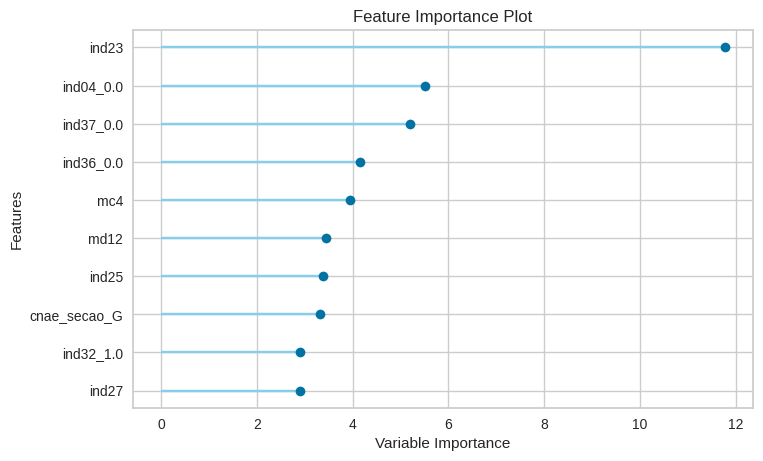

In [ ]:
# Verificar importância das variáveis

pyclass.plot_model(modelo, 'feature')

In [ ]:
holdout = pyclass.predict_model(modelo, data = df_test)

In [ ]:
holdout['Label'].value_counts()

False    766
True     234
Name: Label, dtype: int64

In [ ]:
pycaret_cat3 = pd.DataFrame(zip(holdout.index, holdout['Label'], holdout['Score']), columns=['id','Label','Score_ex_tree'])
pycaret_cat3['Label'].value_counts()

False    766
True     234
Name: Label, dtype: int64

In [ ]:
pycaret_ex_tree.head()

,id,Label,Score_ex_tree
0,3411,False,0.73
1,2177,False,0.69
2,8400,False,0.87
3,464,False,0.62
4,6672,True,0.51


In [ ]:
pycaret_cat3.to_csv('pycaret_cat3.csv', index=False, sep=',')

In [ ]:
df_submit = pd.DataFrame(zip(holdout.index, holdout['Label']), columns=['id','target'])
df_submit.to_csv('PyLadies.csv', index=False, sep=',')

In [ ]:
df_submit['target'].value_counts()

In [ ]:
url_modelo_e_target = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/modelo_e_target%20(1).csv'

In [ ]:
modelo_e_target = pd.read_csv(url_modelo_e_target)

In [ ]:
modelo_e_target

,nome_modelo,target_0,target_1
0,cb70,830,170
1,cb70_tuned,820,180
2,cb90,821,179
3,cb90_tuned,811,189
4,cb90_ensemble_boosting,839,161
5,cat,771,229
6,cat1,773,227
7,et2,785,215
8,cat2,776,224
9,cat3,766,234


In [ ]:
modelo_e_target.loc[[9][0]]= ['cat3',766,234]

In [ ]:
modelo_e_target.to_csv('modelo_e_target.csv', index=False, sep=',')

### TUNED

In [ ]:
tuned = pyclass.tune_model(cat, n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7561,0.7334,0.3916,0.4545,0.4207,0.2674,0.2685
1,0.7316,0.7109,0.3054,0.3864,0.3411,0.1755,0.1774
2,0.7193,0.6748,0.2994,0.3597,0.3268,0.1514,0.1524
3,0.7371,0.7163,0.3054,0.3984,0.3458,0.1848,0.1874
4,0.7439,0.7161,0.3533,0.4245,0.3856,0.2255,0.2271
5,0.7861,0.7519,0.3653,0.5446,0.4373,0.3115,0.3210
6,0.7517,0.7219,0.3434,0.4385,0.3851,0.2325,0.2352
7,0.7381,0.7288,0.3554,0.4097,0.3806,0.2156,0.2165
8,0.7503,0.7239,0.4217,0.4459,0.4334,0.2735,0.2737
9,0.7326,0.7069,0.3976,0.4074,0.4024,0.2302,0.2303


In [ ]:
# Verificar importância das variáveis
pyclass.plot_model(tuned, 'feature')

NameError: ignored

In [ ]:
tuned_holdout = pyclass.predict_model(tuned, data = df_test)
tuned_holdout['Label'].value_counts()


In [ ]:
#df_pycaret['lda_setup_tuned_AUC'] = holdout['Label']
#df_pycaret.to_csv('df_pycaret_Label_modelos.csv', index=False, sep=',')
pycaret_cb90_tuned = pd.DataFrame(zip(tuned_holdout.index, tuned_holdout['Label'], tuned_holdout['Score']), columns=['id','Label','Score'])
pycaret_cb90_tuned['Label'].value_counts()

In [ ]:
pycaret_cb90_tuned['Label'].value_counts()[0]

In [ ]:
pycaret_cb90.head()

In [ ]:
modelos=['cb70', 'cb70_tuned', 'cb90', 'cb90_tuned', 'cb90_ensemble_boosting']
modelos

In [ ]:
target_0 = [pycaret_cb['Label'].value_counts()[0], pycaret_cb_tuned['Label'].value_counts()[0], pycaret_cb90['cb90'].value_counts()[0], pycaret_cb90_tuned['Label'].value_counts()[0],pycaret_cb90_ensemble_boosting['Label'].value_counts()[0]]
type(target_0)

In [ ]:
target_1 = [pycaret_cb['Label'].value_counts()[1], pycaret_cb_tuned['Label'].value_counts()[1], pycaret_cb90['cb90'].value_counts()[1], pycaret_cb90_tuned['Label'].value_counts()[1],pycaret_cb90_ensemble_boosting['Label'].value_counts()[1]]

In [ ]:
modelo_e_target = pd.DataFrame(zip(modelos, target_0,target_1),columns=['nome_modelo','target_0','target_1'])
modelo_e_target.to_csv('modelo_e_target.csv', index=False, sep=',')

In [ ]:
modelo_e_target

In [ ]:
df_submit = pd.DataFrame(zip(tuned_holdout.index, tuned_holdout['Label']), columns=['id','target'])
df_submit.to_csv('PyLadies1.csv', index=False, sep=',')

In [ ]:
df_submit['target'].value_counts()

In [ ]:
df_pycaret['catboost_setup_tuned_F1'].value_counts()

In [ ]:
pycaret_cb_tuned.to_csv('pycaret_cb_tuned.csv', index=False, sep=',')

### ENSEMBLE MODEL

In [ ]:
# cb90 => 'boosting'

In [ ]:
boosting = pyclass.ensemble_model(modelo, method= 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7825,0.7459,0.2711,0.5398,0.3609,0.2468,0.2681
1,0.7704,0.7281,0.2533,0.4872,0.3333,0.2110,0.2275
2,0.7664,0.7468,0.2933,0.4748,0.3626,0.2293,0.2392
3,0.7573,0.7299,0.2178,0.4298,0.2891,0.1613,0.1748
4,0.7593,0.7339,0.2622,0.4470,0.3305,0.1958,0.2061
5,0.7523,0.7198,0.2578,0.4234,0.3204,0.1798,0.1880
6,0.7593,0.7293,0.2444,0.4435,0.3152,0.1838,0.1958
7,0.7593,0.7383,0.2124,0.4404,0.2866,0.1625,0.1782
8,0.7654,0.7325,0.2655,0.4724,0.3399,0.2107,0.2236
9,0.7782,0.7495,0.2622,0.5221,0.3491,0.2328,0.2528


In [ ]:
holdout = pyclass.predict_model(boosting, data = df_test)
holdout['Label'].value_counts()

0    839
1    161
Name: Label, dtype: int64

In [ ]:
holdout.head(1)

,cnae2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,...,md5_o,md7_o,md8_o,md9_o,md10_o,md12_o,mc1_o,mc3_o,mc4_o,rf2_d,rf2_i,rf2_k,rf2_p,rf2_q,rf2_r,rf2_s,rf2_v,rf2_y,rf2_z,cnae_secao_0,cnae_secao_A,cnae_secao_B,cnae_secao_C,cnae_secao_D,cnae_secao_E,cnae_secao_F,cnae_secao_G,cnae_secao_H,cnae_secao_I,cnae_secao_J,cnae_secao_K,cnae_secao_L,cnae_secao_M,cnae_secao_N,cnae_secao_P,cnae_secao_Q,cnae_secao_R,cnae_secao_S,Label,Score
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3411,71,0.017485,0.004743,0.111771,0.003121,0.003121,0.0,0.005432,0.023085,0.00989,0.011346,0.0,0.13132,0.000176,0.0,1.442161e-09,0.000917,0.0,0.0326,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.75,1.0,...,0.297611,0.150525,0.425478,0.243343,0.623462,0.424363,0.04456,4.620425e-07,0.273459,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.6018


In [ ]:
pycaret_cb90_ensemble_boosting = pd.DataFrame(zip(holdout.index, holdout['Label'], holdout['Score']), columns=['id','Label','Score'])
pycaret_cb90_ensemble_boosting['Label'].value_counts()

0    839
1    161
Name: Label, dtype: int64

In [ ]:
#f'"0 = " : {pycaret_cb90_ensemble_boosting['Label'].value_counts()[0]}, "1 = " : {pycaret_cb90_ensemble_boosting['Label'].value_counts()[1]}'
pycaret_cb90_ensemble_boosting.to_csv('pycaret_cb90_ensemble_boosting.csv', index=False, sep=',')

In [ ]:
pycaret_cb90_ensemble_boosting['Label'].value_counts()[0]

839

In [ ]:
classification.interpret_model(boosting)

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)


In [ ]:
# tentando rodar: ensemble model com modelo 'tuned' (cb90_tuned)

In [ ]:
boosting_tuned = pyclass.ensemble_model(tuned, method= 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7784,0.7345,0.2711,0.5214,0.3567,0.2387,0.2573
1,0.7613,0.7422,0.2400,0.4500,0.3130,0.1845,0.1979
2,0.7744,0.7468,0.3067,0.5036,0.3812,0.2531,0.2648
3,0.7523,0.7289,0.2044,0.4071,0.2722,0.1422,0.1545
4,0.7593,0.7373,0.2800,0.4500,0.3452,0.2074,0.2162
5,0.7523,0.7191,0.2622,0.4245,0.3242,0.1827,0.1907
6,0.7805,0.7274,0.2889,0.5285,0.3736,0.2541,0.2711
7,0.7613,0.7415,0.2168,0.4495,0.2925,0.1695,0.1859
8,0.7704,0.7246,0.3053,0.4929,0.3770,0.2457,0.2563
9,0.7792,0.7505,0.2533,0.5278,0.3423,0.2289,0.2512


In [ ]:
holdout = pyclass.predict_model(boosting_tuned, data = df_test)

pycaret_cb90_tuned_ensemble_boosting = pd.DataFrame(zip(holdout.index, holdout['Label'], holdout['Score']), columns=['id','Label','Score'])
pycaret_cb90_tuned_ensemble_boosting.to_csv('pycaret_cb90_tuned_ensemble_boosting.csv', index=False, sep=',')

modelos[6] = ['pycaret_cb90_tuned_ensemble_boosting']
target_0[6] = [pycaret_cb90_tuned_ensemble_boosting['Label'].value_counts()[0]]
target_1[6] = [pycaret_cb90_tuned_ensemble_boosting['Label'].value_counts()[1]]


NameError: ignored

### SIMULAR REGRESSÃO

In [ ]:
_# Treinar modelos
from pycaret import regression as pyreg
best_reg = pyreg.compare_models()

ValueError: ignored

### PULAR

In [ ]:
url_train = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/desafio_train.csv'
url_test = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/desafio_test.csv'

df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

In [ ]:
f'"df_train.shape:":{df_train.shape}, "df_test.shape:": {df_test.shape}, "df_total.shape:": {df_total.shape}'

'"df_train.shape:":(11033, 63), "df_test.shape:": (1000, 62), "df_total.shape:": (12033, 80)'

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11033 non-null  int64  
 1   cnae2   11033 non-null  int64  
 2   rf2     11033 non-null  object 
 3   md1     11033 non-null  float64
 4   md2     11033 non-null  float64
 5   md3     11033 non-null  float64
 6   md4     11033 non-null  float64
 7   md5     11033 non-null  float64
 8   md6     11033 non-null  float64
 9   md7     11033 non-null  float64
 10  md8     11033 non-null  float64
 11  md9     11033 non-null  float64
 12  md10    11033 non-null  float64
 13  md11    11033 non-null  float64
 14  md12    11033 non-null  float64
 15  mc1     10431 non-null  float64
 16  mc2     10431 non-null  float64
 17  mc3     10431 non-null  float64
 18  mc4     11033 non-null  float64
 19  ind01   10999 non-null  float64
 20  ind02   10999 non-null  float64
 21  ind03   10999 non-null  float64
 22

In [ ]:
df_train.columns

Index(['id', 'cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43', 'target'],
      dtype='object')

In [ ]:
df_train.describe()

,id,cnae2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43
count,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,10431.000000,10431.000000,1.043100e+04,11033.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10434.000000,10434.000000,10434.000000,10434.000000,10434.000000,10434.000000,10434.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10434.000000,10434.000000,10999.000000,10999.000000,10434.000000,10434.000000
mean,6007.300462,53.105774,0.011670,0.012928,0.118267,0.013958,0.009200,0.002148,0.015685,0.032194,0.016977,0.011375,0.001760,0.134558,0.002397,0.001699,2.752463e-03,0.001772,0.106722,0.157427,0.346646,0.364934,0.378858,0.397906,0.305112,0.355596,0.007454,0.001375,0.001093,0.141280,0.170552,0.034556,0.019556,0.003789,0.014774,0.004045,0.694791,0.700189,0.544750,0.538172,0.339573,0.333567,0.099865,0.570295,0.550792,0.005119,0.000509,0.000405,0.331121,0.367397,0.999182,0.489044,0.910992,0.729703,0.659605,0.005080,0.134177,0.000273,0.000091,0.170692,0.090905
std,3470.840481,19.885298,0.041618,0.026515,0.021673,0.039367,0.036248,0.025318,0.029024,0.027332,0.041373,0.037942,0.021472,0.014230,0.012884,0.012619,1.366601e-02,0.007012,0.305922,0.315114,0.470182,0.451587,0.449015,0.473002,0.430549,0.440732,0.069064,0.031814,0.029262,0.312289,0.322844,0.161135,0.129848,0.059799,0.118014,0.062567,0.452090,0.450725,0.455767,0.457155,0.433901,0.434164,0.221941,0.425365,0.412976,0.060052,0.013340,0.018207,0.470638,0.482118,0.028595,0.499903,0.284768,0.444134,0.473863,0.071093,0.340858,0.016514,0.009535,0.376258,0.206764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3018.000000,42.000000,0.000003,0.002422,0.110077,0.000000,0.000000,0.000000,0.003157,0.020645,0.000012,0.000000,0.000000,0.130696,0.000086,0.000000,8.487921e-07,0.000064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083300,0.111100,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6016.000000,47.000000,0.000316,0.005415,0.112034,0.002529,0.000033,0.000000,0.006990,0.024210,0.004691,0.000191,0.000000,0.131464,0.000463,0.000000,9.110001e-05,0.000362,0.000000,0.000000,0.000000,0.000000,0.083300,0.021900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.750000,0.583300,0.083300,0.083300,0.000000,0.625000,0.527800,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9003.000000,69.000000,0.006035,0.012740,0.117903,0.011236,0.

In [ ]:
l_train_unique = []
for i in df_train.columns:
  l_train_unique.append(len(df_train[i].unique()))
  #print("coluna:", i, " - len(df_train[i].unique()):", len(df_train[i].unique()))

df_train_unique = pd.DataFrame(zip(df_train.columns,l_train_unique))
df_train_unique

,0,1
0,id,11033
1,cnae2,80
2,rf2,10
3,md1,8829
4,md2,10968
...,...,...
58,ind40,3
59,ind41,3
60,ind42,3
61,ind43,4


In [ ]:
df_train_unique.rename(columns={0:'coluna',1:'qtde_unique'})
df_train_unique = df_train_unique.set_index(0).T
df_train_unique

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target
1,11033,80,10,8829,10968,10967,8168,5612,379,10970,10968,8282,5777,340,10967,9925,1484,8157,10451,14,1417,194,14,765,227,2101,2522,331,45,22,1554,2503,830,77,24,45,13,488,429,17,17,46,46,748,159,164,5,3,6,3,3,3,3,3,3,3,3,3,3,3,3,4,2


In [ ]:
df_train.isna().sum()

id          0
cnae2       0
rf2         0
md1         0
md2         0
         ... 
ind40      34
ind41      34
ind42     599
ind43     599
target      0
Length: 63, dtype: int64

In [ ]:
df_nan = df_train.isna().sum()
df_nan[df_nan.values>0].sort_values()
df_nan[df_nan.values>0].index

Index(['mc1', 'mc2', 'mc3', 'ind01', 'ind02', 'ind03', 'ind04', 'ind05',
       'ind06', 'ind07', 'ind08', 'ind09', 'ind10', 'ind11', 'ind12', 'ind13',
       'ind14', 'ind15', 'ind16', 'ind17', 'ind18', 'ind19', 'ind20', 'ind21',
       'ind22', 'ind23', 'ind24', 'ind25', 'ind26', 'ind27', 'ind28', 'ind29',
       'ind30', 'ind31', 'ind32', 'ind33', 'ind34', 'ind35', 'ind36', 'ind37',
       'ind38', 'ind39', 'ind40', 'ind41', 'ind42', 'ind43'],
      dtype='object')

In [ ]:
df_nan[df_nan.values>0].index

Index(['mc1', 'mc2', 'mc3', 'ind01', 'ind02', 'ind03', 'ind04', 'ind05',
       'ind06', 'ind07', 'ind08', 'ind09', 'ind10', 'ind11', 'ind12', 'ind13',
       'ind14', 'ind15', 'ind16', 'ind17', 'ind18', 'ind19', 'ind20', 'ind21',
       'ind22', 'ind23', 'ind24', 'ind25', 'ind26', 'ind27', 'ind28', 'ind29',
       'ind30', 'ind31', 'ind32', 'ind33', 'ind34', 'ind35', 'ind36', 'ind37',
       'ind38', 'ind39', 'ind40', 'ind41', 'ind42', 'ind43'],
      dtype='object')

In [ ]:
df_nan[df_nan.values==34].index   

# 32 colunas/variáveis que possuem 34 NaN cada
#'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08','ind09', 'ind10',
#'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16', 'ind17', 'ind18', 'ind19', 'ind20',
#'ind28', 'ind29', 'ind30', 'ind31','ind32', 'ind33', 'ind34', 'ind35', 'ind36', 'ind37',
#'ind40', 'ind41']

Index(['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind28', 'ind29', 'ind30', 'ind31',
       'ind32', 'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind40', 'ind41'],
      dtype='object')

In [ ]:
len(df_nan[df_nan.values==34].index)

32

In [ ]:
df_nan[df_nan.values==599].index    

# 11 colunas/variáveis que possuem 599 NaN cada:
# 'ind21', 'ind22', 'ind23', 'ind24', 'ind25', 'ind26', 'ind27',
# 'ind38', 'ind39',
# 'ind42', 'ind43'

Index(['ind21', 'ind22', 'ind23', 'ind24', 'ind25', 'ind26', 'ind27', 'ind38',
       'ind39', 'ind42', 'ind43'],
      dtype='object')

In [ ]:
len(df_nan[df_nan.values==599].index)

11

In [ ]:
df_nan[df_nan.values==602].index    

# 3 colunas/variáveis que possuem 602 NaN cada
# ['mc1', 'mc2', 'mc3']

Index(['mc1', 'mc2', 'mc3'], dtype='object')

In [ ]:
linhas_602nan = df_train['mc1'][df_train['mc1'].isna()].index

Int64Index([   26,    27,    32,    34,    47,    64,    76,    88,   100,
              121,
            ...
            10848, 10891, 10911, 10921, 10935, 10941, 10979, 10986, 10991,
            11007],
           dtype='int64', length=602)

In [ ]:
linhas_599nan = df_train['ind21'][df_train['ind21'].isna()].index

In [ ]:
len(set(list(linhas_602nan)) & set(list(linhas_599nan)))  
# 602nan e 599nan apresentam 596 linhas em comum
# então tem 3 linhas em 599nan que não estão em 602 nan e
# 6 linhas em 602nan que não estão em 599nan

596

In [ ]:
set(list(linhas_602nan)) - set(list(linhas_599nan)) # 6 linhas {1213, 1224, 3233, 5346, 6101, 7297} em 602nan mas não em 599nan

{1213, 1224, 3233, 5346, 6101, 7297}

In [ ]:
set(list(linhas_599nan)) - set(list(linhas_602nan)) # 3 linhas {5788, 10284, 10965} em 599nan mas não em 602nan

{5788, 10284, 10965}

In [ ]:
linhas_34nan = df_train['ind01'][df_train['ind01'].isna()].index

In [ ]:
set(list(linhas_34nan)) & set(list(linhas_599nan))  # 34nan e 599nan não apresentam linhas nan em comum

set()

In [ ]:
set(list(linhas_34nan)) & set(list(linhas_602nan)) # linhas {1213, 1224, 3233, 5346, 6101, 7297} em comum em 34nan e 602nan

{1213, 1224, 3233, 5346, 6101, 7297}

In [ ]:
df_train[df_train['mc1'].isna()]['target'].value_counts()

False    596
True       6
Name: target, dtype: int64

In [ ]:
df_train[df_train['mc1'].notna()]['target'].value_counts()

False    7917
True     2514
Name: target, dtype: int64

In [ ]:
df_train[df_train['mc1'].notna()].describe()

,id,cnae2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43
count,10431.000000,10431.00000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,1.043100e+04,10431.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.00000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.00000,10403.000000,10403.000000,10403.000000,10403.000000,10428.000000,10428.00000,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10428.000000,10428.000000,10403.000000,10403.000000,10428.000000,10428.000000
mean,5998.586521,53.33851,0.011993,0.013208,0.118480,0.014551,0.009693,0.002250,0.016025,0.032519,0.017690,0.011992,0.001847,0.134538,0.002397,0.001699,2.752463e-03,0.001872,0.079664,0.133032,0.311410,0.330905,0.345606,0.365514,0.321753,0.37509,0.007881,0.001454,0.001155,0.149238,0.178966,0.036242,0.020676,0.00391,0.014755,0.004276,0.677786,0.686280,0.544727,0.53817,0.339742,0.333741,0.099889,0.570311,0.550781,0.005066,0.000471,0.000428,0.295011,0.333269,0.999135,0.460636,0.907238,0.714602,0.644526,0.005082,0.134254,0.000288,0.000096,0.170790,0.090957
std,3467.890242,19.98793,0.042113,0.026769,0.021848,0.040304,0.037191,0.025934,0.029294,0.027583,0.042321,0.038919,0.022033,0.013933,0.012884,0.012619,1.366601e-02,0.007199,0.267626,0.283498,0.456864,0.438529,0.436875,0.463864,0.435993,0.44446,0.070991,0.032711,0.030087,0.319113,0.328067,0.164659,0.133429,0.06070,0.117785,0.064327,0.458565,0.456224,0.455770,0.45715,0.433962,0.434225,0.221986,0.425340,0.412952,0.059627,0.012832,0.018721,0.456070,0.471405,0.029402,0.498472,0.290112,0.451626,0.478680,0.071113,0.340941,0.016980,0.009804,0.376344,0.206812
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3012.500000,42.00000,0.000004,0.002518,0.110123,0.000052,0.000000,0.000000,0.003261,0.020741,0.000236,0.000000,0.000000,0.130695,0.000086,0.000000,8.487921e-07,0.000090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.083300,0.111100,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6006.000000,47.00000,0.000389,0.005624,0.112164,0.002776,0.000147,0.000000,0.007169,0.024386,0.005072,0.000477,0.000000,0.131472,0.000463,0.000000,9.110001e-05,0.000414,0.000000,0.000000,0.000000,0.000000,0.015500,0.000000,0.000000,0.00140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.750000,0.58330,0.083300,0.083300,0.000000,0.625000,0.527800,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8990.500000,69.00000,0.006366,0.013060,0.118149,0.011908,0.004606,0.000000,0.016753,

In [ ]:
df_train['target'].value_counts()   22,84% True e 77,16% False

False    8513
True     2520
Name: target, dtype: int64

In [ ]:
# Total de 46 Colunas/variáveis que apresentam NaN:
# 'mc1', 'mc2', 'mc3',
# 'ind01', 'ind02', 'ind03', 'ind04', 'ind05','ind06', 'ind07', 'ind08', 'ind09', 'ind10',
# 'ind21', 'ind22', 'ind23', 'ind24', 'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30',
# 'ind31', 'ind32', 'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
# 'ind41', 'ind42', 'ind43'
sendo:
  # 32 colunas/variáveis que possuem 34 NaN cada
    #'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08','ind09', 'ind10',
    #'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16', 'ind17', 'ind18', 'ind19', 'ind20',
    #'ind28', 'ind29', 'ind30', 'ind31','ind32', 'ind33', 'ind34', 'ind35', 'ind36', 'ind37',
    #'ind40', 'ind41'
  # 11 colunas/variáveis que possuem 599 NaN cada:
    # 'ind21', 'ind22', 'ind23', 'ind24', 'ind25', 'ind26', 'ind27',
    # 'ind38', 'ind39',
    # 'ind42', 'ind43'
  # 3 colunas/variáveis que possuem 602 NaN cada
    # ['mc1', 'mc2', 'mc3']

# 602nan e 599nan apresentam 596 linhas em comum, então:
# 3 linhas em 599nan que não estão em 602 nan : {5788, 10284, 10965}
# 6 linhas em 602nan que não estão em 599nan : {1213, 1224, 3233, 5346, 6101, 7297}

# 602nan e 34nan apresentam 6 linhas em comum {1213, 1224, 3233, 5346, 6101, 7297} , que são as mesmas 6 linhas que não estão em 599nan
# 599nan e 34nan não apresentam linhas em comum

# Total de 633 linhas com NaN ( = 596 + 3 + 6 + 28)

In [ ]:
s_coluna = pd.Series(list(df_train.columns))
s_qtde = pd.Series(list(df_train.isna().sum()))

In [ ]:
df_nan = pd.DataFrame(zip(s_coluna, s_qtde),columns = ['coluna','qtde_nan'])
df_nan

In [ ]:
df_nan[df_nan['qtde_nan']!=0]

In [ ]:
len(df_nan[df_nan['qtde_nan']!=0])        # 46 variáveis/colunas apresentam NaN

46

In [ ]:
df_train[df_train['mc1'].isna()]['target'].value_counts()

False    596
True       6
Name: target, dtype: int64

In [ ]:
df_train['ind06'].value_counts().head()     # alta correlação com 'ind32'

0.0000    5441
1.0000    4081
0.1671      62
0.1534      41
0.1644      38
Name: ind06, dtype: int64

In [ ]:
df_train['ind32'].value_counts()

0.0    6958
1.0    4041
Name: ind32, dtype: int64

In [ ]:
df_train['ind04'].value_counts().head()     # alta correlação com 'ind05'

0.0000    5812
1.0000    3151
0.0833     532
0.9167     258
0.1667     224
Name: ind04, dtype: int64

In [ ]:
df_train['ind05'].value_counts().head()

0.0000    4776
1.0000    3161
0.0833     434
0.9167     250
0.1667     179
Name: ind05, dtype: int64

In [ ]:
df_train['ind03'].value_counts().head()     # alta correlação com 'ind31'

0.0000    6844
1.0000    3642
0.0027      21
0.0055      12
0.1671      11
Name: ind03, dtype: int64

In [ ]:
df_train['ind31'].value_counts()

0.0    7357
1.0    3642
Name: ind31, dtype: int64

In [ ]:
df_train['ind23'].value_counts().head()     # alta correlação com 'ind24'

0.0000    5018
1.0000    2847
0.0833     833
0.1667     400
0.2500     218
Name: ind23, dtype: int64

In [ ]:
df_train['ind24'].value_counts().head()

0.0000    5136
1.0000    2837
0.0833     835
0.1667     377
0.2500     208
Name: ind24, dtype: int64

In [ ]:
df_train['ind42'].value_counts().head()   #alta correlação com 'ind43'

0.0    8653
1.0    1781
Name: ind42, dtype: int64

In [ ]:
df_train['ind43'].value_counts().head()

0.0    8653
0.5    1665
1.0     116
Name: ind43, dtype: int64

In [ ]:
df_train['md2'].value_counts().head()

0.015110    8
0.001655    7
0.004966    6
0.001986    6
0.001324    5
Name: md2, dtype: int64

In [ ]:
df_train['md8'].value_counts().head()

0.039463    8
0.017749    7
0.025066    6
0.019375    5
0.019700    5
Name: md8, dtype: int64

In [ ]:
df_train['md7'].value_counts().head()

0.022106    8
0.001986    7
0.001655    6
0.007449    6
0.003310    5
Name: md7, dtype: int64

In [ ]:
df_train['target'].value_counts()

False    8513
True     2520
Name: target, dtype: int64

In [ ]:
df_train.isna().sum()

id        0
cnae2     0
rf2       0
md1       0
md2       0
         ..
ind40     0
ind41     0
ind42     0
ind43     0
target    0
Length: 63, dtype: int64

In [ ]:
df_train.info()

Outliers

In [ ]:
def calcula_outliers(df):
    Q1 = []
    Q3 = []
    IQR = []
    linf = []
    lsup = []
    qtde_inf = []
    qtde_sup = []
    col = []
    for i in df.select_dtypes(include=['float64']).columns:
        q1 = np.percentile(df[i],25)
        q3 = np.percentile(df[i],75)
        iqr = q3 - q1
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr
        Q1.append(q1)
        Q3.append(q3)
        IQR.append(iqr)
        linf.append(lim_inf)
        lsup.append(lim_sup)
        qtde_inf.append(len(df[df[i]<lim_inf]))
        qtde_sup.append(len(df[df[i]>lim_sup]))
        col.append(i)
    return (Q1, Q3, IQR, linf, lsup, qtde_inf, qtde_sup, col)

In [ ]:
Q1, Q3, IQR, linf, lsup, qtde_inf, qtde_sup, col = calcula_outliers(df_train) 

In [ ]:
df_outliers = pd.DataFrame(np.array([Q1, Q3, IQR, linf, lsup, qtde_inf, qtde_sup]), columns=[lcol] )

In [ ]:
df_outliers.rename(index = {0:'q1', 1:'q3', 2:'iqr', 3:'lim_inf', 4:'lim_sup', 5:'abaixo_lim_inf', 6:'acima_lim_sup'})

,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43
q1,0.000003,0.002422,0.110077,0.000000,0.000000,0.0,0.003157,0.020645,0.000012,0.000000,0.0,0.130696,NaN,NaN,NaN,0.000064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q3,0.006035,0.012740,0.117903,0.011236,0.004189,0.0,0.016366,0.032773,0.016200,0.007306,0.0,0.133893,NaN,NaN,NaN,0.001370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iqr,0.006032,0.010318,0.007826,0.011236,0.004189,0.0,0.013209,0.012128,0.016188,0.007306,0.0,0.003198,NaN,NaN,NaN,0.001306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lim_inf,-0.009046,-0.013055,0.098338,-0.016855,-0.006283,0.0,-0.016656,0.002453,-0.024269,-0.010959,0.0,0.125899,NaN,NaN,NaN,-0.001895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lim_sup,0.015083,0.028217,0.129641,0.028091,0.010472,0.0,0.036180,0.050965,0.040482,0.018265,0.0,0.138690,NaN,NaN,NaN,0.003329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abaixo_lim_inf,0.000000,0.000000,4.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,48.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acima_lim_sup,1658.000000,1181.000000,1203.000000,1338.000000,1718.000000,379.0,1110.000000,1098.000000,1129.000000,1578.000000,339.0,1297.000000,0.0,0.0,0.0,1233.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train.drop(['id','cnae2'],axis=1,inplace=False).describe()

,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43
count,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000
mean,0.011670,0.012928,0.118267,0.013958,0.009200,0.002148,0.015685,0.032194,0.016977,0.011375,0.001760,0.134558,0.002292,0.001607,0.002607,0.001772,0.106393,0.156942,0.345577,0.363809,0.377947,0.396748,0.304172,0.354500,0.007431,0.001371,0.001089,0.140845,0.170026,0.034449,0.019496,0.003777,0.014728,0.004032,0.695732,0.701113,0.555893,0.540622,0.325660,0.319979,0.094443,0.573265,0.549543,0.005103,0.000508,0.000403,0.330101,0.366265,0.999184,0.487537,0.911266,0.730536,0.660654,0.004804,0.126892,0.000272,0.000091,0.161425,0.085969
std,0.041618,0.026515,0.021673,0.039367,0.036248,0.025318,0.029024,0.027332,0.041373,0.037942,0.021472,0.014230,0.012535,0.012276,0.013302,0.007012,0.305507,0.314749,0.469850,0.451344,0.448622,0.472732,0.430218,0.440494,0.068959,0.031765,0.029217,0.311906,0.322485,0.160898,0.129652,0.059707,0.117835,0.062471,0.451710,0.450337,0.445655,0.444689,0.425934,0.426005,0.217015,0.413842,0.401642,0.059960,0.013319,0.018179,0.470270,0.481805,0.028551,0.499867,0.284372,0.443702,0.473509,0.069146,0.332867,0.016488,0.009520,0.367939,0.202125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000003,0.002422,0.110077,0.000000,0.000000,0.000000,0.003157,0.020645,0.000012,0.000000,0.000000,0.130696,0.000100,0.000000,0.000001,0.000064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104200,0.138900,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000316,0.005415,0.112034,0.002529,0.000033,0.000000,0.006990,0.024210,0.004691,0.000191,0.000000,0.131464,0.000463,0.000000,0.000091,0.000362,0.000000,0.000000,0.000000,0.000000,0.083300,0.021900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.750000,0.583300,0.083300,0.083300,0.000000,0.625000,0.527800,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.006035,0.012740,0.117903,0.011236,0.004189,0.000000,0.016366,0.032773,0.016200,0.007306,0.000000,0.133893,0.001608,0.000000,0.001221,0.001370,0.000000,0.083300,1.000000,1.000000,1.000000,1.000000,0.860800,0.931500,0.000

In [ ]:
df_test.isna().sum().sum()

0

In [ ]:
df_train.isna().sum()

id          0
cnae2       0
rf2         0
md1         0
md2         0
         ... 
ind40      34
ind41      34
ind42     599
ind43     599
target      0
Length: 63, dtype: int64

In [ ]:
def f_trata_outliers(df):
    for i in df.select_dtypes(include=['float64']).columns:
        q1 = np.percentile(df[i],25)
        q3 = np.percentile(df[i],75)
        iqr = q3 - q1
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr
        df[i][df[i] < lim_inf] = lim_inf
        df[i][df[i] > lim_sup] = lim_sup
    return df

In [ ]:
f_trata_outliers(df_train)

In [ ]:
f_trata_outliers(df_test)

In [ ]:
# função que trata NaN:
def f_trata_NaN(df):
    coluna_nan = df.isna().sum()[df.isna().sum().values>0].index
    for col in coluna_nan:
      df[col] = df[col].fillna(df[col].median())
    return df

In [ ]:
# tratando NaN nos dataframes df_train e df_test:
df_train = f_trata_NaN(df_train)
df_test = f_trata_NaN(df_test)

In [ ]:
# criando dummies em df_train e df_test:
df_train = pd.get_dummies(df_train, drop_first=False)
df_test = pd.get_dummies(df_test, drop_first=False)

In [ ]:
f'"df_train.shape:":{df_train.shape}, "df_test.shape:":{df_test.shape}'

'"df_train.shape:":(11033, 72), "df_test.shape:":(1000, 71)'

### PULAR PARA PYCARET

In [ ]:
!pip install pycaret

In [ ]:
df_train['target'].astype('category')

0         True
1        False
2        False
3        False
4        False
         ...  
11028    False
11029    False
11030     True
11031    False
11032     True
Name: target, Length: 11033, dtype: category
Categories (2, object): [False, True]

In [ ]:
# definindo X (sem 'id' e 'target'), y (variável target) e X_submit (sem 'id'): 
X = df_train.drop(columns= ['id','target'], axis= 1)
y = df_train['target']
X_submit = df_test.drop(columns='id',axis=1)

f'"X.shape:":{X.shape}, "y.shape:":{y.shape}, "X_submit.shape:":{X_submit.shape}'

'"X.shape:":(11033, 70), "y.shape:":(11033,), "X_submit.shape:":(1000, 70)'

In [ ]:
X.columns

Index(['cnae2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8', 'md9',
       'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4', 'ind01', 'ind02',
       'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08', 'ind09', 'ind10',
       'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16', 'ind17', 'ind18',
       'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24', 'ind25', 'ind26',
       'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32', 'ind33', 'ind34',
       'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40', 'ind41', 'ind42',
       'ind43', 'rf2_d', 'rf2_i', 'rf2_k', 'rf2_p', 'rf2_q', 'rf2_r', 'rf2_s',
       'rf2_v', 'rf2_y', 'rf2_z'],
      dtype='object')

MODELO: XGBoost

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# Função para cross validation:
def funcao_cross_val_score(modelo, X_treinamento, y_treinamento, CV):
    #versão com cross_val_score::
    a_scores_CV = cross_val_score(modelo, X_treinamento, y_treinamento, cv = CV)
    print(f'Média das Acurácias calculadas pelo CV....: {100*round(a_scores_CV.mean(),4)}')
    print(f'std médio das Acurácias calculadas pelo CV: {100*round(a_scores_CV.std(),4)}')
    return a_scores_CV

In [ ]:
# Função para Confusion Matrix:
from sklearn.metrics import confusion_matrix 
def mostra_confusion_matrix(cf, 
                            group_names = None, 
                            categories = 'auto', 
                            count = True, 
                            percent = True, 
                            cbar = True, 
                            xyticks = False, 
                            xyplotlabels = True, 
                            sum_stats = True, 
                            figsize = (8, 8), 
                            cmap = 'Blues'):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

In [ ]:
i_CV = 10 # Número de Cross-Validations
i_Seed = 22091980 # semente por questões de reproducibilidade
f_Test_Size = 0.3 # Proporção do dataframe de validação (outros valores poderiam ser 0.15, 0.20 ou 0.25)

In [ ]:
# Definindo dataframes de TREINAMENTO e TESTE a partir de X e y:

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = f_Test_Size, random_state = i_Seed)
f'"X_treinamento.shape:" {X_treinamento.shape}, "y_treinamento_shape:"{y_treinamento.shape},"X_teste.shape:"{X_teste.shape},"y_teste.shape:"{y_teste.shape}'

'"X_treinamento.shape:" (7723, 70), "y_treinamento_shape:"(7723,),"X_teste.shape:"(3310, 70),"y_teste.shape:"(3310,)'

In [ ]:
# Instancia...
ml_XGB= XGBClassifier(silent=False,
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 1,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth= 3, 
                      gamma=1, 
                      max_delta_step=5)

In [ ]:
# Modelo treinado sobre base "train-split-test"
ml_XGB.fit(X_treinamento, y_treinamento)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.01, max_delta_step=5, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.8, verbosity=1)

In [ ]:
# Chamando a função do CROSS VALIDATION - Modelo treinado sobre base "train-split-test":

a_scores_CV = funcao_cross_val_score(ml_XGB, X_treinamento, y_treinamento, i_CV)

Média das Acurácias calculadas pelo CV....: 77.39
std médio das Acurácias calculadas pelo CV: 0.51


In [ ]:
y_pred = ml_XGB.predict(X_teste)     # Modelo treinado sobre base "train-split-test"

unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [3185  125]]


In [ ]:
y_submit_0 = ml_XGB.predict(X_submit)     # Modelo treinado sobre base "train-split-test"

unique_elements, counts_elements = np.unique(y_submit_0, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  0   1]
 [952  48]]


In [ ]:
# CV com X_treinamento e y_treinamento:       # Modelo treinado sobre base "train-split-test"
# Acurácia Média / STD médio
# 77,38 / 0,54  tirando outliers - 70% X
# 77,39 / 0,51  sem tirar outliers - 70% X

# y_pred = ml_XGB.predict(X_teste)
# 0: 3177, 1: 133 => tirando outliers de df_train - 30% X
# 0: 3185, 1: 125 => sem tirar outliers de df_train - 30% X

# y_submit = ml_XGB.predict(X_submit) ====> X_submit (from df_test (test.csv), mas sem 'id')
#  ???????????  => tirando outliers de df_train (não rodei)
# 0: 952, 1: 48 => sem tirar outliers de df_train (70% X)


********* CONFUSION MATRIX - PARAMETER TUNNING ***********


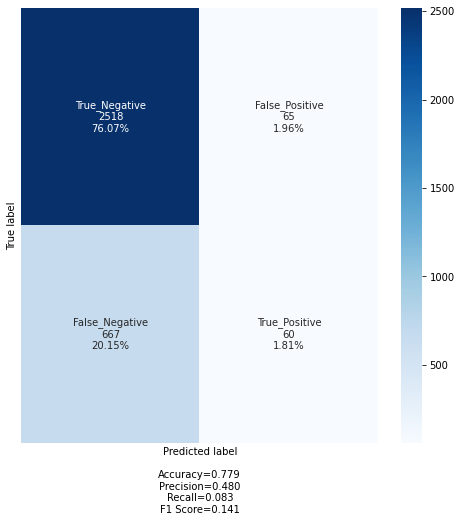

In [ ]:
# Confusion Matrix

print(f'\n********* CONFUSION MATRIX - PARAMETER TUNNING ***********')
cf_matrix = confusion_matrix(y_teste, y_pred)
cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
cf_categories = ['Zero', 'One']
mostra_confusion_matrix(cf_matrix, group_names = cf_labels, categories = cf_categories)


### Treinando o modelo sobre toda a base (100% de df_train, X_treinamento = 100% X, y_treinamento = 100% y)
ml_XGB.fit(X, y)

In [ ]:
ml_XGB_1 = XGBClassifier(silent=False,
                         scale_pos_weight=1,
                         learning_rate=0.01,  
                         colsample_bytree = 1,
                         subsample = 0.8,
                         objective='binary:logistic', 
                         n_estimators=1000, 
                         reg_alpha = 0.3,
                         max_depth= 3, 
                         gamma=1, 
                         max_delta_step=5)

In [ ]:
# treinando o modelo sobre toda a base X (100% de df_train)
ml_XGB1.fit(X, y)

In [ ]:
a_scores_CV = funcao_cross_val_score(ml_XGB_1, X, y, i_CV)

Média das Acurácias calculadas pelo CV....: 77.8
std médio das Acurácias calculadas pelo CV: 0.5599999999999999


In [ ]:
# ml_XGB_1                            # Modelo treinado sobre X e y (100% df_train)

# CV com X e y:                                             # Modelo treinado sobre toda base X (100% df_train)
# AcuráciaMédia / STD médio
# ??????????? => tirando outliers
# 77,80 / 0,559  => sem tirar outliers

# y_pred = ml_XGB.predict(X_teste) ====> X_teste (% sobre X)
# 0: 3194, 1: 116 => tirando outliers de df_train
# 0: 3199, 1: 111 => sem tirar outliers de df_train

# y_submit calculado com modelo treinado sobre TODA A BASE 'X' (100% df_train):

# y_submit = ml_XGB_1.predict(X_submit) ====> X_submit (from df_test (test.csv), mas sem 'id')
# 0: 955, 1: 45 => tirando outliers de df_train ==> PyLadies.csv com pontuação = 0,4610
# 0: 956, 1: 44 => sem tirar outliers de df_train

In [ ]:
a_scores_CV = funcao_cross_val_score(ml_XGB_1, X, y, i_CV)

Média das Acurácias calculadas pelo CV....: 77.8
std médio das Acurácias calculadas pelo CV: 0.5599999999999999


In [ ]:
y_pred_1 = ml_XGB_1.predict(X_teste)
unique_elements, counts_elements = np.unique(y_pred_1, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [3199  111]]


In [ ]:
# Confusion Matrix

print(f'\n********* CONFUSION MATRIX - PARAMETER TUNNING ***********')
cf_matrix = confusion_matrix(y_teste, y_pred_1)
cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
cf_categories = ['Zero', 'One']
mostra_confusion_matrix(cf_matrix, group_names = cf_labels, categories = cf_categories)


In [ ]:
y_submit_1 = ml_XGB_1.predict(X_submit)

unique_elements, counts_elements = np.unique(y_submit_1, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  0   1]
 [952  48]]


In [ ]:
df_submit_1 = pd.DataFrame(zip(df_test['id'],y_submit_1), columns = ['id','target'])

In [ ]:
df_submit.head()

,id,target
0,3411,False
1,2177,False
2,8400,False
3,464,False
4,6672,False


In [ ]:
df_submit_1.to_csv('PyLadies.csv',index = False, sep = ',')

### LGBM

In [ ]:
!pip install lightgbm

In [ ]:
!pip install catboost

     |████████████████████████████████| 66.3MB 65kB/s 


In [ ]:
from time import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

In [ ]:
X_train = X
y_train = y

In [ ]:
X_test = X_submit
y_test = []

In [ ]:
# Preprocessing our data
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf = TfidfVectorizer(max_features=2000)
#X_train = tfidf.fit_transform(df_train).toarray()
#X_test = tfidf.transform(df_test).toarray()
#y_train, y_test = df_train, df_test
X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(X_train, y_train, test_size=0.5,random_state=1234)
# Setting up our results dataframe
df_results = pd.DataFrame(columns=['accuracy', 'run_time'])

In [ ]:
lgbm = LGBMClassifier(n_estimators=2000,
                      feature_fraction=0.06,
                      bagging_fraction=0.67,
                      bagging_freq=1,
                      verbose=0,
                      n_jobs=6,
                      random_state=1234,
                      force_row_wise=True)

In [ ]:
cb = CatBoostClassifier(n_estimators=2000,
                        colsample_bylevel=0.06,
                        max_leaves=31,
                        subsample=0.67,
                        verbose=0,
                        thread_count=6,
                        random_state=1234)

In [ ]:
models = [lgbm, cb]
model_names = [i.__class__.__name__ for i in models]

In [ ]:
es_models = ['LGBMClassifier',
             'CatBoostClassifier']

In [ ]:
for m, n in zip(models, model_names):
    
    start_time = time()
    if n in es_models:
        m.fit(X_train_sub,
              y_train_sub,
              eval_set = [(X_valid, y_valid)],
              early_stopping_rounds=15,
              verbose=0)
    else:
        m.fit(X_train, y_train)
    
    run_time = time() - start_time
    accuracy = np.mean(m.predict(X_test) == y_test)
        
    df_results.loc[n] = [accuracy, run_time]
    
    del m

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


In [ ]:
df_results

,accuracy,run_time
LGBMClassifier,0.0,0.917237
CatBoostClassifier,0.0,2.017664


In [ ]:
y_pred_lgbm = lgbm.predict(X_test)

In [ ]:
unique_elements, counts_elements = np.unique(y_pred_lgbm, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  0   1]
 [961  39]]


In [ ]:
y_pred_cb = cb.predict(X_test)

In [ ]:
unique_elements, counts_elements = np.unique(y_pred_cb, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[['False' 'True']
 [965 35]]


### ZENILSON

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

In [ ]:
i_Seed = 19961108
X = df_train.drop('target', axis=1)
y = df_train['target']
X_submit = df_test

preditoras = X
target = y
df_testeTratado = X_submit

In [ ]:
X_total = pd.concat([X,X_submit])
f'"X.shape:":{X.shape}, "X_submit.shape:":{X_submit.shape},"X_total.shape:":{X_total.shape}'

'"X.shape:":(11033, 52), "X_submit.shape:":(1000, 52),"X_total.shape:":(12033, 52)'

In [ ]:
X_total = pd.get_dummies(X_total, drop_first=False)
f'"X_total.shape:":{X_total.shape}'

'"X_total.shape:":(12033, 70)'

In [ ]:
X_total.isna().sum().sum()

9915

In [ ]:
## Aqui, como passo intermediário, executei o modelo usando o dataframe default (getDataFrameDefault) e analisei a importância das features:
## então fui modificando o dataframe excluindo as features menos importantes...
## OBS: para utilizar, carregar antes a função treina_testa
'''
df_default = otdf_Treino.getDataFrameDefault()
preditoras = df_default.copy()
preditoras.drop(columns=["Churn","id"],inplace=True)
target = df_treinoTratado["Churn"]
categorical_features_indices = np.where(preditoras.dtypes != np.float)[0] #considerei todas as features que não são do tipo "flutuante" como categóricas
print(f"Qtde de features categóricas: {len(categorical_features_indices)}")
print(f"Colunas preditoras: {preditoras.columns}")

acc = treina_testa(mostrarFI=True)
print(f"acc: {acc}")

In [ ]:
X.info()

In [ ]:
#considerei todas as features que não são do tipo "flutuante" como categóricas
#categorical_features_indices = np.where(preditoras.dtypes != np.float)[0]

categorical_features_indices = ['cnae_secao', 'ind01','ind04','ind17','ind18', 'ind21','ind22', 'ind28', 
                                'ind31', 'ind32', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38','ind39',
                                'ind42', 'ind43']
len(categorical_features_indices)

18

In [ ]:
def treina_testa(ts=0.30,it=300, lr=0.03, depth=5, gerarArquivo=False, mostrarFI=False):
   X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(preditoras, target, test_size = ts)#, random_state = i_Seed)
   catb = CatBoostClassifier(iterations = it, learning_rate = lr, depth=depth, silent=True)
   catb_tuned = catb.fit(  X_treinamento, y_treinamento, cat_features=categorical_features_indices)
   y_pred = catb_tuned.predict(X_submit)
   acc_catb = round(accuracy_score(y_pred, y_teste) * 100, 2)
   #print('ts: {} it: {} lr: {} depth: {} -> '.format(ts,it,lr,depth)+'Train Data Success Score: %' + str(acc_catb))
   if (mostrarFI == True):
      l_fi = list(zip(catb_tuned.feature_importances_,X_treinamento.columns))
      print(l_fi)

   if gerarArquivo == True: 
      df_id = df_test[["id"]]
      df_teste3 = df_testeTratado #.drop(columns=["id"],axis=1)
      resposta = catb_tuned.predict(df_teste3)
      resposta_df = pd.DataFrame(resposta, columns=['target'])
      resultado_submissao = pd.concat([df_id, resposta_df],axis=1)
      resultado_submissao.head().T
      filename = 'submissao_kaggle_catb_fs_ts0{}_it{}_lr{}_depth{}_sc{}.csv'.format(round(ts*100,0),it, lr, depth,str(int(acc_catb*100)))
      resultado_submissao.to_csv(filename, index=False)   
      print(filename)
   return acc_catb   
   #result


In [ ]:
acc = treina_testa(mostrarFI=True)

CatBoostError: ignored

In [ ]:
ts=0.30
it=300
lr=0.03
depth=5
gerarArquivo=False
mostrarFI=False
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(preditoras, target, test_size = ts)

In [ ]:
catb = CatBoostClassifier(iterations = it, learning_rate = lr, depth=depth, silent=True)

In [ ]:
catb_tuned = catb.fit(X_treinamento, y_treinamento, cat_features=categorical_features_indices)

CatBoostError: ignored

In [ ]:
y_pred = catb_tuned.predict(X_submit)

In [ ]:
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[['False' 'True']
 [963 37]]


In [ ]:
categorical_features_indices

array([ 0, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69])

In [ ]:
def treina_testa(ts=0.30,it=300, lr=0.03, depth=5, gerarArquivo=False, mostrarFI=False):
   X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(preditoras, target, test_size = ts)#, random_state = i_Seed)
   catb = CatBoostClassifier(iterations = it, learning_rate = lr, depth=depth, silent=True)
   catb_tuned = catb.fit(  X_treinamento, y_treinamento, cat_features=categorical_features_indices)
   y_pred = catb_tuned.predict(X_submit)
   acc_catb = round(accuracy_score(y_pred, y_teste) * 100, 2)
   #print('ts: {} it: {} lr: {} depth: {} -> '.format(ts,it,lr,depth)+'Train Data Success Score: %' + str(acc_catb))
   if (mostrarFI == True):
      l_fi = list(zip(catb_tuned.feature_importances_,X_treinamento.columns))
      print(l_fi)

   if gerarArquivo == True: 
      df_id = df_test[["id"]]
      df_teste3 = df_testeTratado #.drop(columns=["id"],axis=1)
      resposta = catb_tuned.predict(df_teste3)
      resposta_df = pd.DataFrame(resposta, columns=['target'])
      resultado_submissao = pd.concat([df_id, resposta_df],axis=1)
      resultado_submissao.head().T
      filename = 'submissao_kaggle_catb_fs_ts0{}_it{}_lr{}_depth{}_sc{}.csv'.format(round(ts*100,0),it, lr, depth,str(int(acc_catb*100)))
      resultado_submissao.to_csv(filename, index=False)   
      print(filename)
   return acc_catb   
   #result


In [ ]:
f'"X_treinamento=" : {X_treinamento.shape}, "y_treinamento=" : {y_treinamento.shape}, "X_teste=":{X_teste.shape},"y_teste=":{y_teste.shape},"X_submit=":{X_submit.shape}'

'"X_treinamento=" : (7723, 70), "y_treinamento=" : (7723,), "X_teste=":(3310, 70),"y_teste=":(3310,),"X_submit=":(1000, 70)'

In [ ]:
#l_ts = [0.22, 0.24, 0.25, 0.26, 0.28, 0.30, 0.32]
#l_it =  [300, 400, 500], 
#l_lr = [0.02, 0.03, 0.04]
#l_depth = [2, 3, 4, 5]
l_ts, l_it, l_lr, l_depth = [0.26], [400], [0.02], [3]
resultado = {}

for vez in range(1,11):
   resultado[vez] = {"ts":[], "it":[], "lr":[],"depth":[],"score":[]}
   for ts in l_ts:
       print(f'execução {vez}/ts {ts}...')
       for it in l_it:
           for lr in l_lr:
               for depth in l_depth:
                  res = treina_testa(ts=ts, it=it, lr=lr, depth=depth,gerarArquivo=False, mostrarFI=False) #não vai salvar o arquivo e nem mostrar as melhores features
                  resultado[vez]["ts"].append(ts)
                  resultado[vez]["it"].append(it)
                  resultado[vez]["lr"].append(lr)
                  resultado[vez]["depth"].append(depth)
                  resultado[vez]["score"].append(res)

execução 1/ts 0.26...


ValueError: ignored